<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코드소스에 있는 데이터탐색 원본 파일이 없어서 갖고 있는 데이터 다 합쳐서 통합df 생성
-  통합 df로 데이터 탐색
- BA는 의사 두명의 평균값으로 새로운 컬럼 BA 



## 데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
%matplotlib inline

In [10]:
!pip install pickle5

     |████████████████████████████████| 132 kB 7.8 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219323 sha256=0943c819271a39ef06bb8dda57d24ae7ddc1399791e3e127fc9c24abd429c2f8
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


## 데이터 탐색

In [45]:
df.isnull().sum()

No.        0
Group      0
등록번호       0
생년월일       0
성별         0
진료의        0
검사 시 나이    0
신장         0
체중         0
BMI        0
처방일자       0
시행일자       0
BA 1       0
BA 2       0
dtype: int64

In [46]:
df.describe()

,Group,등록번호,성별,검사 시 나이,신장,체중,BMI,BA 1,BA 2
count,378.000000,3.780000e+02,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,1223.706349,7.544013e+06,1.579365,10.681612,135.976190,34.581746,17.931217,10.744048,10.694444
std,620.349791,1.207052e+06,0.494315,3.365552,18.466414,13.077332,2.954443,3.816471,3.858689
min,9.000000,3.323383e+06,1.000000,2.953425,88.200000,10.300000,8.700000,1.750000,1.500000
25%,667.000000,7.369624e+06,1.000000,7.458219,119.975000,23.125000,15.800000,7.000000,7.000000
50%,1411.000000,7.919978e+06,2.000000,11.227397,140.450000,34.200000,17.450000,11.250000,11.500000
75%,1743.000000,8.310500e+06,2.000000,13.245205,150.000000,43.475000,19.600000,14.000000,14.000000
max,2116.000000,1.018294e+07,2.000000,17.775342,172.100000,76.000000,29.400000,17.000000,17.000000


In [47]:
df_add= df['BA 1']+df['BA 2']
df['BA'] = df_add/2
df

,No.,Group,등록번호,생년월일,성별,진료의,검사 시 나이,신장,체중,BMI,처방일자,시행일자,BA 1,BA 2,BA
0,310,1698,8255049,2007-08-03,2,1,9.969863,129.5,26.9,16.1,2017-01-09,2017-07-20,9.75,9.75,9.750
1,311,1897,8537405,2008-08-22,2,1,9.989041,132.0,31.0,17.8,2018-02-28,2018-08-16,10.50,11.00,10.750
2,312,1422,7942635,2005-01-19,2,1,10.008219,136.4,33.2,17.9,2015-01-20,2015-01-20,11.00,11.25,11.125
3,313,1475,7995857,2005-02-09,2,1,10.049315,133.5,31.2,17.6,2015-02-25,2015-02-25,10.00,10.25,10.125
4,314,1888,8520261,2008-09-11,2,1,10.060274,130.6,23.7,13.9,2018-10-01,2018-10-01,10.00,9.75,9.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,227_M,1995,8680666,2011-07-16,1,1,7.852055,122.1,23.2,15.6,2018-11-20,2019-05-21,6.50,6.50,6.500
46,228_M,1818,8412353,2012-03-07,1,2,7.879452,119.1,27.6,19.5,2019-07-23,2020-01-21,6.50,6.00,6.250
47,229_M,1706,8264892,2008-07-29,1,1,7.887671,125.1,27.3,17.5,2016-06-16,2016-06-16,7.00,6.50,6.750
48,230_M,228,5889504,2006-09-15,1,1,7.890411,121.0,23.2,15.9,2014-01-20,2014-08-04,6.50,6.25,6.375


In [48]:
df= df.drop(['BA 1','BA 2'],axis=1)
df.head()

,No.,Group,등록번호,생년월일,성별,진료의,검사 시 나이,신장,체중,BMI,처방일자,시행일자,BA
0,310,1698,8255049,2007-08-03,2,1,9.969863,129.5,26.9,16.1,2017-01-09,2017-07-20,9.750
1,311,1897,8537405,2008-08-22,2,1,9.989041,132.0,31.0,17.8,2018-02-28,2018-08-16,10.750
2,312,1422,7942635,2005-01-19,2,1,10.008219,136.4,33.2,17.9,2015-01-20,2015-01-20,11.125
3,313,1475,7995857,2005-02-09,2,1,10.049315,133.5,31.2,17.6,2015-02-25,2015-02-25,10.125
4,314,1888,8520261,2008-09-11,2,1,10.060274,130.6,23.7,13.9,2018-10-01,2018-10-01,9.875


## 골연령 그래프

In [49]:
# 파생변수 골연령(개월), 정규화된 값 추가
df['boneage']= df.BA*12    # 골개월
ba_mean= df.boneage.mean()
ba_std= df.boneage.std()
df['BA_std']= df.boneage.std()
df['BA_z'] = (df.boneage-ba_mean)/ba_std     # 정규화
df.head()

,No.,Group,등록번호,생년월일,성별,진료의,검사 시 나이,신장,체중,BMI,처방일자,시행일자,BA,boneage,BA_std,BA_z
0,310,1698,8255049,2007-08-03,2,1,9.969863,129.5,26.9,16.1,2017-01-09,2017-07-20,9.750,117.0,45.943694,-0.253157
1,311,1897,8537405,2008-08-22,2,1,9.989041,132.0,31.0,17.8,2018-02-28,2018-08-16,10.750,129.0,45.943694,0.008033
2,312,1422,7942635,2005-01-19,2,1,10.008219,136.4,33.2,17.9,2015-01-20,2015-01-20,11.125,133.5,45.943694,0.105979
3,313,1475,7995857,2005-02-09,2,1,10.049315,133.5,31.2,17.6,2015-02-25,2015-02-25,10.125,121.5,45.943694,-0.155211
4,314,1888,8520261,2008-09-11,2,1,10.060274,130.6,23.7,13.9,2018-10-01,2018-10-01,9.875,118.5,45.943694,-0.220508


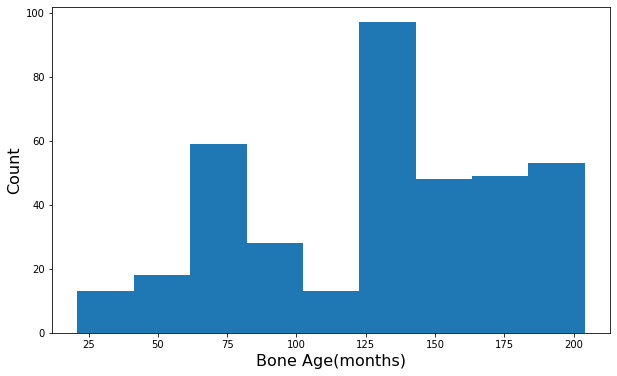

In [50]:
plt.figure(figsize=(10,6))
plt.hist(df['boneage'],bins=9)
plt.xlabel('Bone Age(months)', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


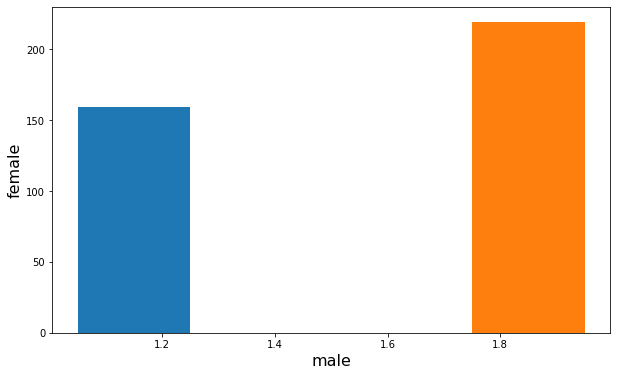

In [51]:
plt.figure(figsize=(10,6))
m= df['성별'].loc[df['성별']==1]
f= df['성별'].loc[df['성별']==2]
plt.hist([m,f],bins=2)
plt.xlabel('male',fontsize=16)
plt.ylabel('female',fontsize=16)
plt.show()

## 성별- 골연령 히스토그램

In [52]:
# 파생변수 골연령대 추가
df['BA_GROUP'] = df['BA'].map(lambda x: int(x)) # 나이 int값만
df.head()


,No.,Group,등록번호,생년월일,성별,진료의,검사 시 나이,신장,체중,BMI,처방일자,시행일자,BA,boneage,BA_std,BA_z,BA_GROUP
0,310,1698,8255049,2007-08-03,2,1,9.969863,129.5,26.9,16.1,2017-01-09,2017-07-20,9.750,117.0,45.943694,-0.253157,9
1,311,1897,8537405,2008-08-22,2,1,9.989041,132.0,31.0,17.8,2018-02-28,2018-08-16,10.750,129.0,45.943694,0.008033,10
2,312,1422,7942635,2005-01-19,2,1,10.008219,136.4,33.2,17.9,2015-01-20,2015-01-20,11.125,133.5,45.943694,0.105979,11
3,313,1475,7995857,2005-02-09,2,1,10.049315,133.5,31.2,17.6,2015-02-25,2015-02-25,10.125,121.5,45.943694,-0.155211,10
4,314,1888,8520261,2008-09-11,2,1,10.060274,130.6,23.7,13.9,2018-10-01,2018-10-01,9.875,118.5,45.943694,-0.220508,9


In [53]:
# 성별값 1,2를 텍스트 male, female로 변경
df['성별']= df['성별'].replace([1,2],['Male','Female'])
df.head()

,No.,Group,등록번호,생년월일,성별,진료의,검사 시 나이,신장,체중,BMI,처방일자,시행일자,BA,boneage,BA_std,BA_z,BA_GROUP
0,310,1698,8255049,2007-08-03,Female,1,9.969863,129.5,26.9,16.1,2017-01-09,2017-07-20,9.750,117.0,45.943694,-0.253157,9
1,311,1897,8537405,2008-08-22,Female,1,9.989041,132.0,31.0,17.8,2018-02-28,2018-08-16,10.750,129.0,45.943694,0.008033,10
2,312,1422,7942635,2005-01-19,Female,1,10.008219,136.4,33.2,17.9,2015-01-20,2015-01-20,11.125,133.5,45.943694,0.105979,11
3,313,1475,7995857,2005-02-09,Female,1,10.049315,133.5,31.2,17.6,2015-02-25,2015-02-25,10.125,121.5,45.943694,-0.155211,10
4,314,1888,8520261,2008-09-11,Female,1,10.060274,130.6,23.7,13.9,2018-10-01,2018-10-01,9.875,118.5,45.943694,-0.220508,9


In [54]:
# 성별, BA 연령대별로 pivot-table 생성
df_ = df.loc[:,['No.','성별','BA_GROUP']]
df_pivot= df_.pivot_table(index=['성별'],columns=['BA_GROUP'],values=['No.'],aggfunc=['count'],fill_value=0, margins=True)
df_pivot

count                                                               
           No.                                                               
BA_GROUP     1  2  3   4   5   6   7  8  9  10  11  12  13  14  15 16 17  All
성별                                                                           
Female       1  9  5   4   0   0   0  0  3  35  47  16   9  28  58  4  0  219
Male         0  0  0  10  23  42  18  6  5   5  15  24   2   0   2  5  2  159
All          1  9  5  14  23  42  18  6  8  40  62  40  11  28  60  9  2  378

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


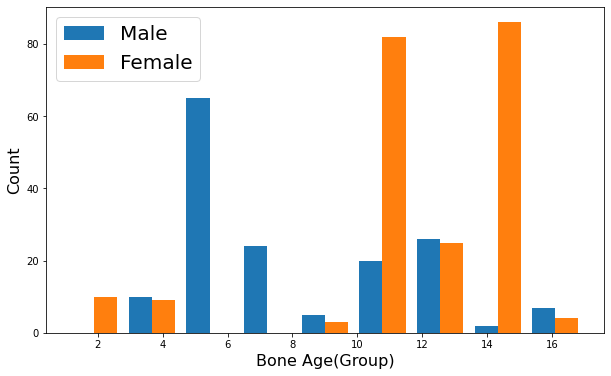

In [55]:
# 골연령대 기준으로 히스토그램 
plt.figure(figsize=(10,6))
m= df.loc[df['성별']=='Male']['BA_GROUP']
f= df.loc[df['성별']=='Female']['BA_GROUP']

plt.hist([m,f],bins=9)
plt.legend(['Male','Female'], fontsize=20)
plt.xlabel('Bone Age(Group)', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [ ]:
# 분포가 왜이러지..............

## 신장-골연령 산점도

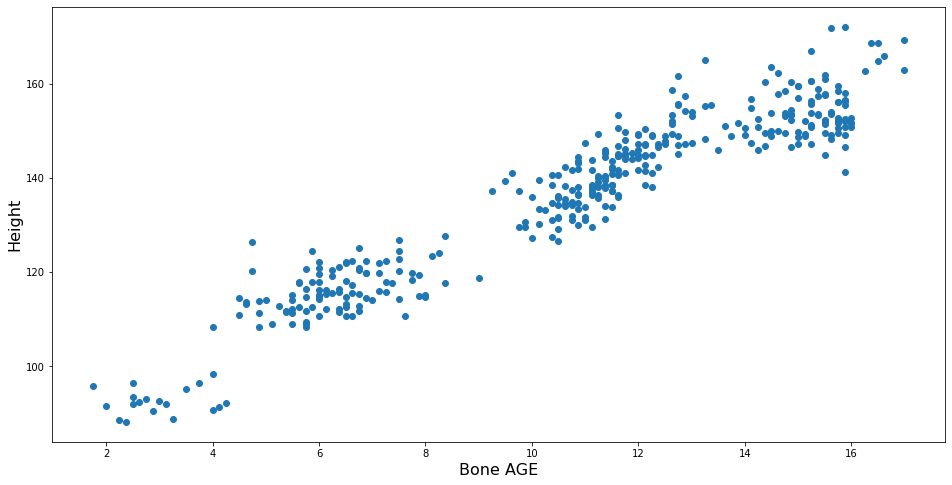

In [56]:
plt.figure(figsize=(16,8))
plt.scatter(x=df['BA'], y=df['신장'])
plt.xlabel('Bone AGE', fontsize=16)
plt.ylabel('Height', fontsize=16)
plt.show()